# Teorema do Limite Central

## Lançamento de Moedas - Distribuição de Bernoulli

Consideremos o lançamento de moedas. Se $X$ for o lado da moeda que cai no lançamento de cada moeda, entãto se estamos interessados em saber se o lançamento foi uma "cara", então temos duas possibilidades para $X$: 
$$ \begin{align} X = 1 \ &: \text{cara} \\ X = 0 \ &: \text{coroa} \end{align} $$

Sabemos que $X$ segue uma distribuição de Bernoulli:
$$ f(x) = \begin{cases} p^x \, (1-p)^{1-x}, \ \ \ &x = 0, 1 \\ 0, \ \ \ \ \ \ &\text{caso contrário,} \end{cases}$$
onde $p$ é a probabilidade de sucesso.

Considere que lançamos $n$ moedas. Repetimos este experimento $N$ vezes.

In [1]:
p<-0.25 # probabilidade de sucesso
n<-c(5,10,50,100) # número de moedas em cada experimento
N<-10000 # número de repetições do experimento

col_lst <- c("black", "blue", "red", "green")
pltp <- "b"

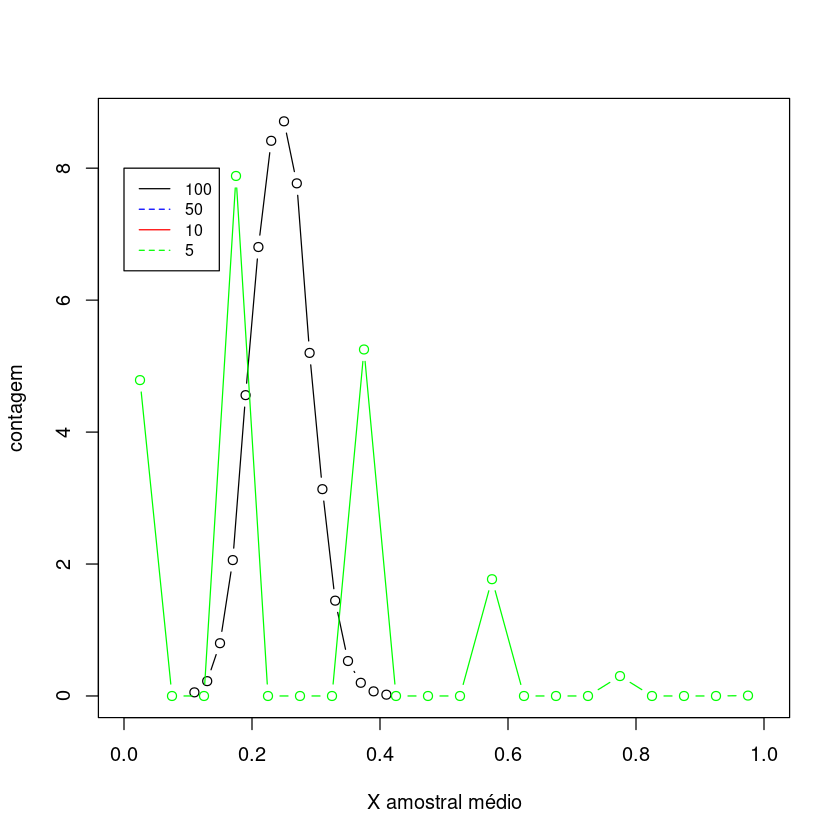

In [4]:
h<-list()
media_h<-list()
for (idx in 1:length(n)) {
    tmp<-rbinom(n[idx]*N,1,p)
    tmp<-matrix(tmp,N)
    media<-apply(tmp,1,function(x) mean(x))
    media_h<-append(media_h,list(media))
    h<-append(h,list(hist(media,plot=F)))
}

#vamos plotar as médias
plot(h[[4]]$mids,h[[4]]$density,type=pltp,xlim=c(0,1),xlab="X amostral médio", ylab="contagem")
#lines(h[[3]]$mids,h[[3]]$density,type=pltp, col=col_lst[2])
#lines(h[[2]]$mids,h[[2]]$density,type=pltp, col=col_lst[3])
lines(h[[1]]$mids,h[[1]]$density,type=pltp, col=col_lst[4])
legend(0,8,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

In [5]:
# vamos converter na distribuição normal padrão
h2<-list()
for (idx in 1:length(n)) {
    dnp<-(media_h[[idx]]-p)*sqrt(n[idx])/(p*(1-p))
    h2<-append(h2,list(hist(dnp,plot=F)))
}

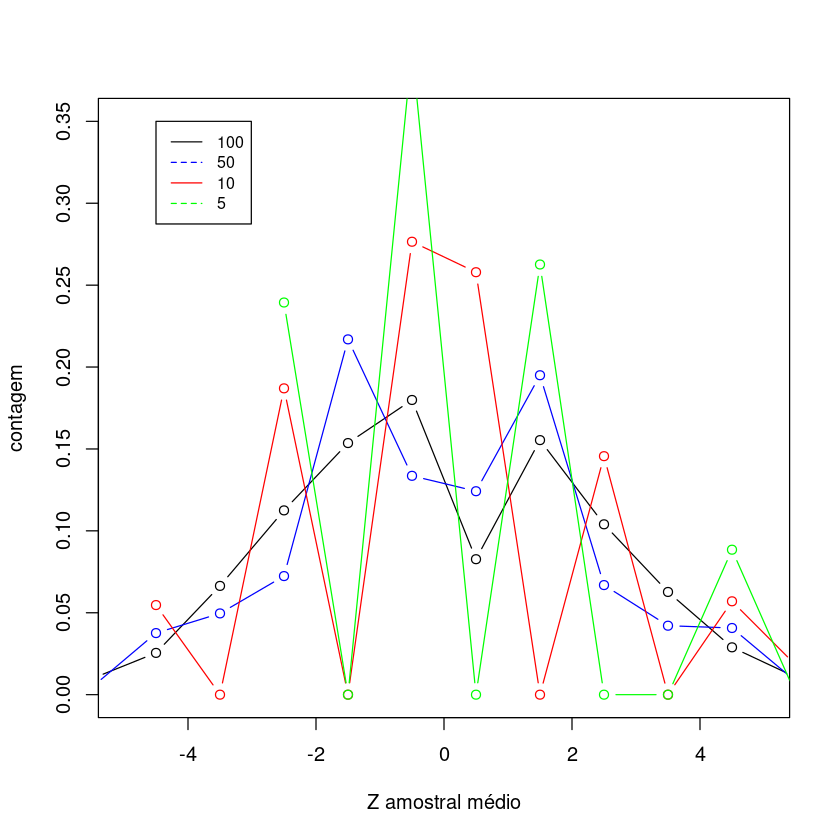

In [6]:
# vamos plotar as médias
plot(h2[[4]]$mids,h2[[4]]$density,type=pltp,xlim=c(-5,5), ylim=c(0,0.35),xlab="Z amostral médio", ylab="contagem")
lines(h2[[3]]$mids,h2[[3]]$density,type=pltp, col=col_lst[2])
lines(h2[[2]]$mids,h2[[2]]$density,type=pltp, col=col_lst[3])
lines(h2[[1]]$mids,h2[[1]]$density,type=pltp, col=col_lst[4])
legend(-4.5,0.35,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

## Distribuição Binomial

Considere uma variável aleatória $X$ que segue uma distribuição binomial $f(x)$:
$$ f(x) = \begin{cases} \binom{n}{x} \ p^n \ (1-p)^{n-x}, \ \ \ \ \ &x=0,1,...,n \\ 0, &\text{caso contrário}, \end{cases} $$
onde $p$ é a probabilidade de sucesso em um único ensaio de Bernoulli e $n$ é o número de ensaio de Bernoulli no experimento (abaixo substituímos $n$ por $nl$). Calculamos a média de $n$ variáveis deste tipo. São realizados $N$ experimentos.

In [95]:
p<-0.25 # probabilidade de sucesso em cada ensaio de Bernoulli
nl<-10  # número de ensaios de Bernoulli
n<-c(5,10,50,100) # em cada experimento calculamos a média deste número de variáveis
N<-5000 # número de experimentos

In [96]:
h<-list()
media_h<-list()
for (idx in 1:length(n)) {
    tmp<-rbinom(n[idx]*N,nl,p)
    tmp<-matrix(tmp,N)
    media<-apply(tmp,1,function(x) mean(x))
    media_h<-append(media_h,list(media))
    h<-append(h,list(hist(media,plot=F)))
}

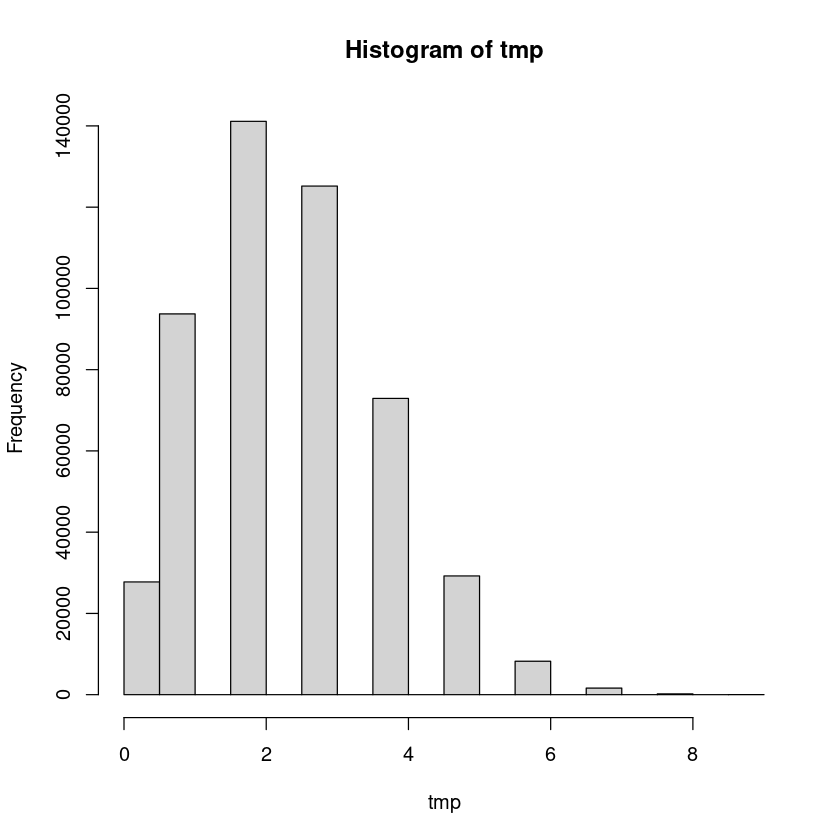

In [97]:
hist(tmp)

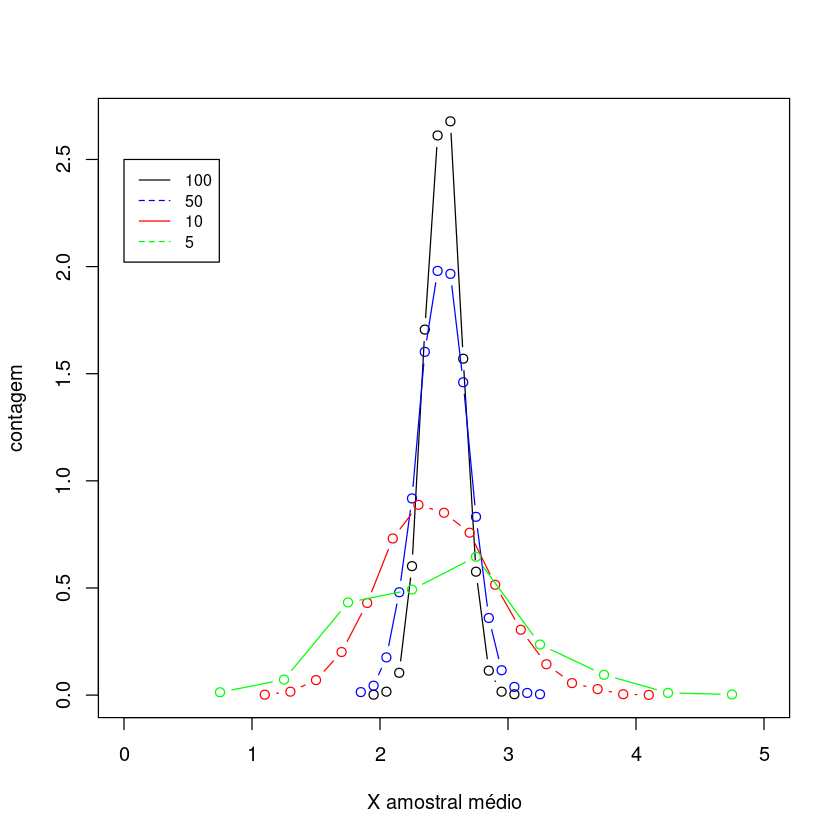

In [98]:
# vamos plotar as médias
plot(h[[4]]$mids,h[[4]]$density,type=pltp,xlim=c(0,2*p*nl),xlab="X amostral médio", ylab="contagem")
lines(h[[3]]$mids,h[[3]]$density,type=pltp, col=col_lst[2])
lines(h[[2]]$mids,h[[2]]$density,type=pltp, col=col_lst[3])
lines(h[[1]]$mids,h[[1]]$density,type=pltp, col=col_lst[4])
legend(0,2.5,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

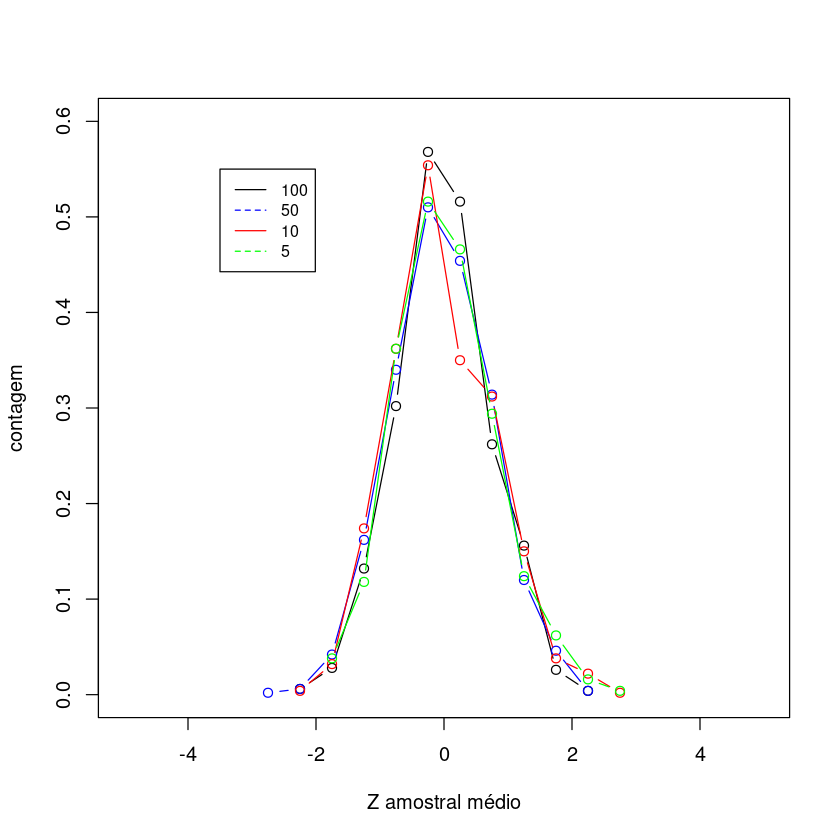

In [61]:
# vamos converter na distribuição normal padrão
media<-nl*p
dp<-nl*p*(1-p)
h2<-list()
for (idx in 1:length(n)) {
    dnp<-(media_h[[idx]]-media)*sqrt(n[idx])/dp
    h2<-append(h2,list(hist(dnp,plot=F)))
}

# vamos plotar as médias
plot(h2[[4]]$mids,h2[[4]]$density,type=pltp,xlim=c(-5,5), ylim=c(0,.6),xlab="Z amostral médio", ylab="contagem")
lines(h2[[3]]$mids,h2[[3]]$density,type=pltp, col=col_lst[2])
lines(h2[[2]]$mids,h2[[2]]$density,type=pltp, col=col_lst[3])
lines(h2[[1]]$mids,h2[[1]]$density,type=pltp, col=col_lst[4])
legend(-3.5,0.55,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

# Distribuição de Poisson


In [75]:
lambda<-1.5
n<-c(5,10,50,100)
N<-1000

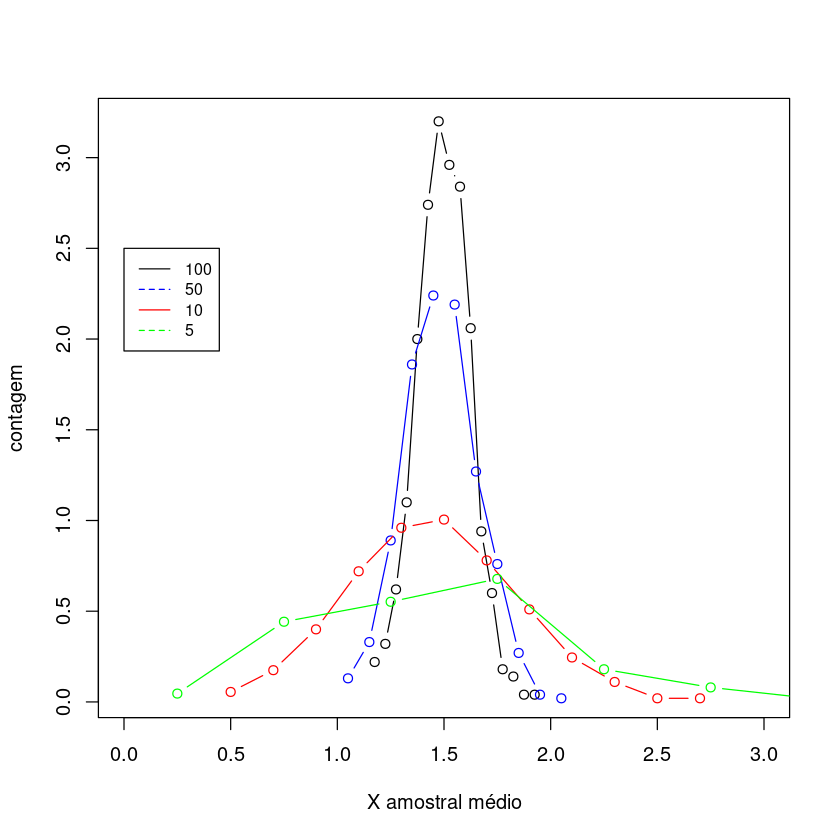

In [84]:
h<-list()
media_h<-list()
for (idx in 1:length(n)) {
    tmp<-rpois(n[idx]*N,lambda)
    tmp<-matrix(tmp,N)
    media<-apply(tmp,1,function(x) mean(x))
    media_h<-append(media_h,list(media))
    h<-append(h,list(hist(media,plot=F)))
}

#vamos plotar as médias
plot(h[[4]]$mids,h[[4]]$density,type=pltp,xlim=c(0,2*lambda),xlab="X amostral médio", ylab="contagem")
lines(h[[3]]$mids,h[[3]]$density,type=pltp, col=col_lst[2])
lines(h[[2]]$mids,h[[2]]$density,type=pltp, col=col_lst[3])
lines(h[[1]]$mids,h[[1]]$density,type=pltp, col=col_lst[4])
legend(0,2.5,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

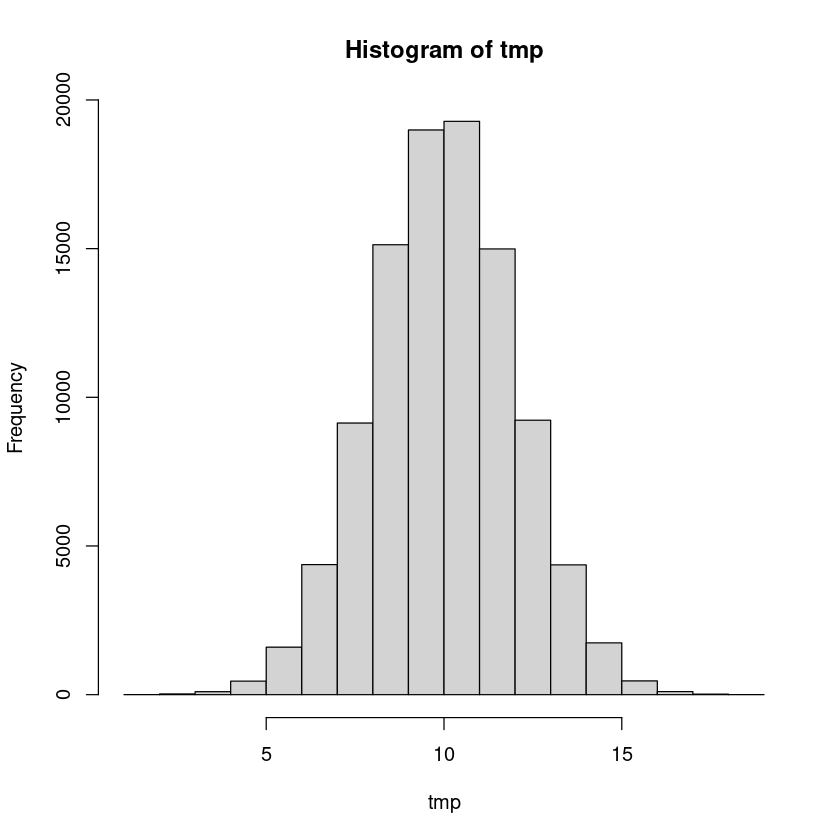

In [74]:
hist(tmp)

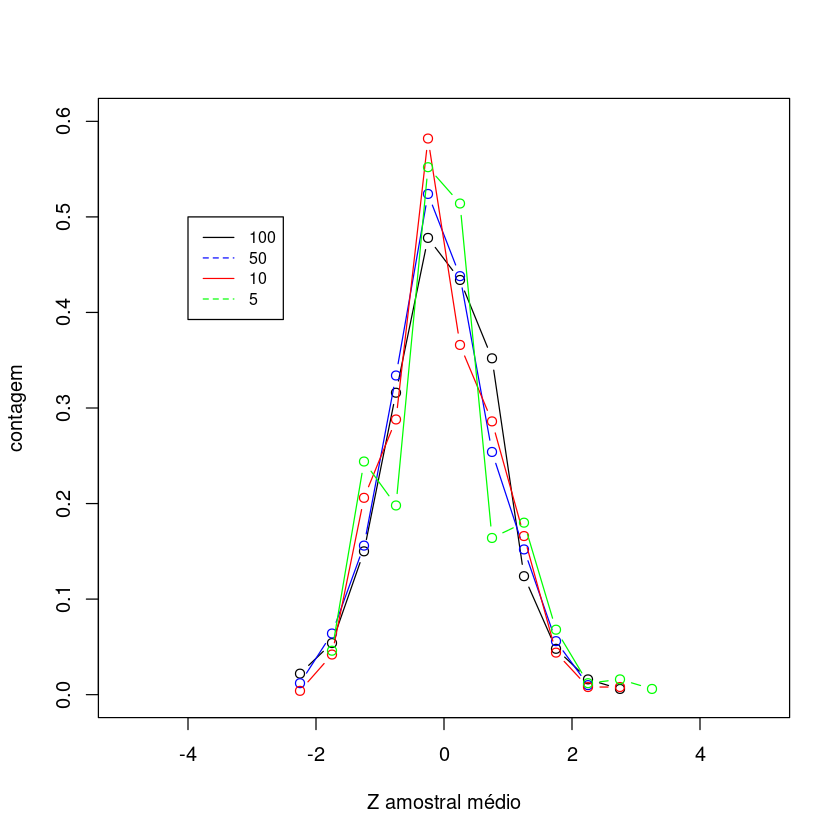

In [85]:
# vamos converter na distribuição normal padrão
media<-lambda
dp<-lambda
h2<-list()
for (idx in 1:length(n)) {
    dnp<-(media_h[[idx]]-media)*sqrt(n[idx])/dp
    h2<-append(h2,list(hist(dnp,plot=F)))
}

# vamos plotar as médias
plot(h2[[4]]$mids,h2[[4]]$density,type=pltp,xlim=c(-5,5), ylim=c(0,.6),xlab="Z amostral médio", ylab="contagem")
lines(h2[[3]]$mids,h2[[3]]$density,type=pltp, col=col_lst[2])
lines(h2[[2]]$mids,h2[[2]]$density,type=pltp, col=col_lst[3])
lines(h2[[1]]$mids,h2[[1]]$density,type=pltp, col=col_lst[4])
legend(-4,0.5,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

# Distribuição Normal

In [69]:
md<-10
dp<-2
n<-c(5,10,50,100)
N<-1000

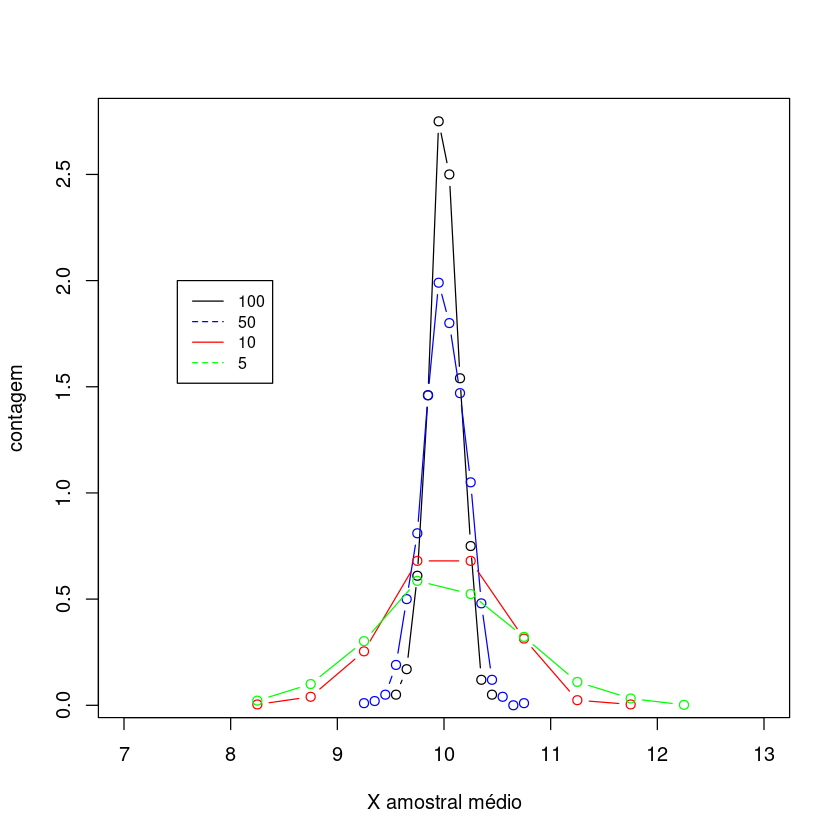

In [86]:
h<-list()
media_h<-list()
for (idx in 1:length(n)) {
    tmp<-rnorm(n[idx]*N,md,dp)
    tmp<-matrix(tmp,N)
    media<-apply(tmp,1,function(x) mean(x))
    media_h<-append(media_h,list(media))
    h<-append(h,list(hist(media,plot=F)))
}

#vamos plotar as médias
plot(h[[4]]$mids,h[[4]]$density,type=pltp,xlim=c(-2*dp+md,2*dp+md),xlab="X amostral médio", ylab="contagem")
lines(h[[3]]$mids,h[[3]]$density,type=pltp, col=col_lst[2])
lines(h[[2]]$mids,h[[2]]$density,type=pltp, col=col_lst[3])
lines(h[[1]]$mids,h[[1]]$density,type=pltp, col=col_lst[4])
legend(7.5,2,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

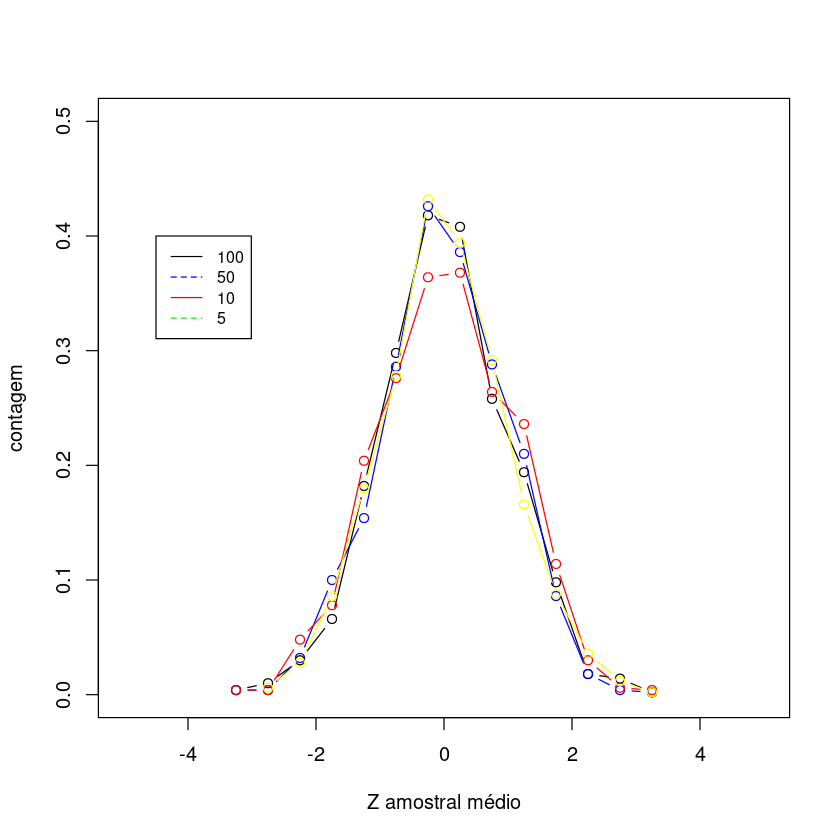

In [89]:
# vamos converter na distribuição normal padrão
media<-md
dp<-dp
h2<-list()
for (idx in 1:length(n)) {
    dnp<-(media_h[[idx]]-media)*sqrt(n[idx])/dp
    h2<-append(h2,list(hist(dnp,plot=F)))
}

# vamos plotar as médias
plot(h2[[4]]$mids,h2[[4]]$density,type=pltp,xlim=c(-5,5), ylim=c(0,.5),xlab="Z amostral médio", ylab="contagem")
lines(h2[[3]]$mids,h2[[3]]$density,type=pltp, col="blue")
lines(h2[[2]]$mids,h2[[2]]$density,type=pltp, col="red")
lines(h2[[1]]$mids,h2[[1]]$density,type=pltp, col="yellow")
legend(-4.5,0.4,legend=c(n[4], n[3], n[2], n[1]),
       col=col_lst, lty=1:2, cex=0.8)

In [101]:
pnorm(-1.77)

[1] 0.03836357